In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

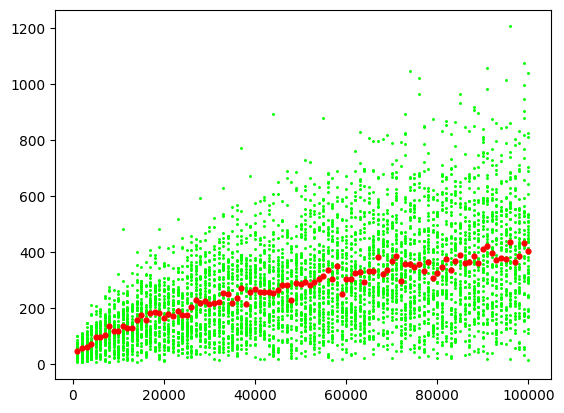

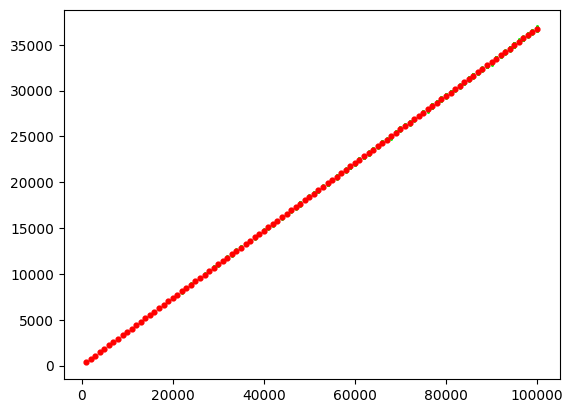

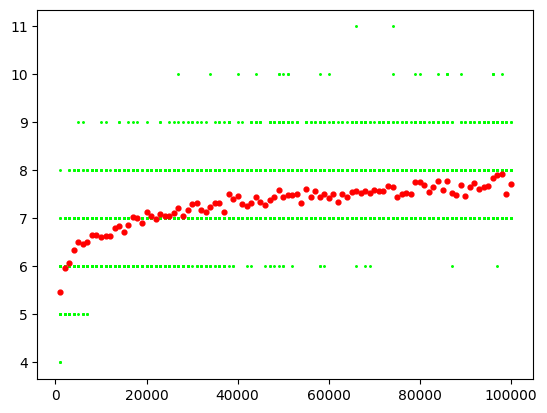

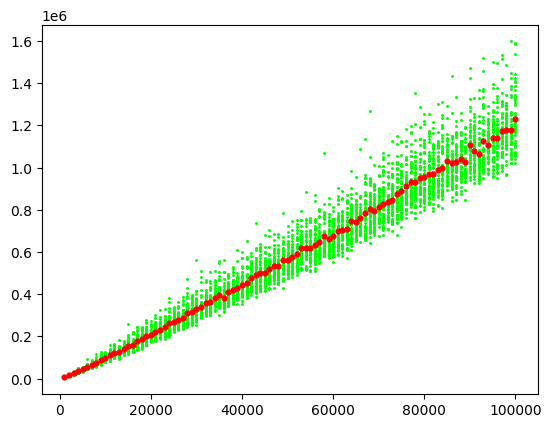

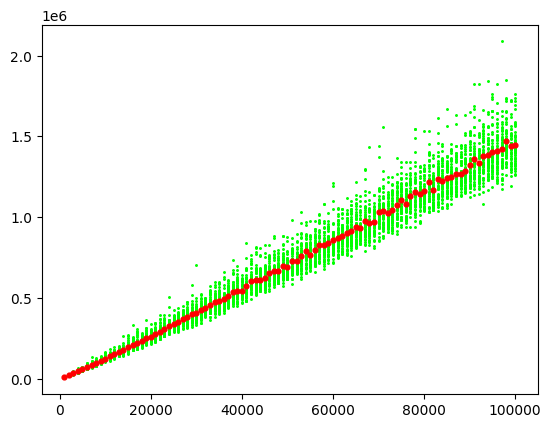

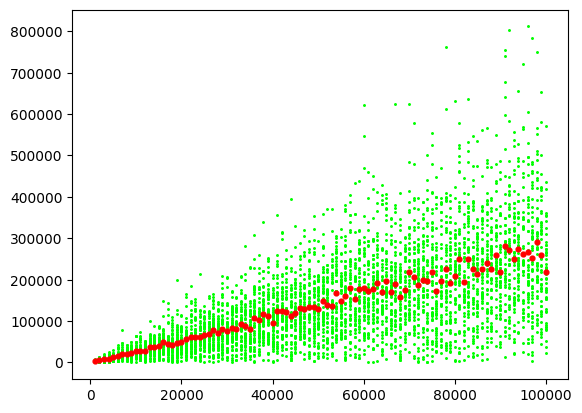

In [30]:
X = np.linspace(1000, 100000, 100) # single X axis
X_r = np.repeat(X, 50)
Y = [[] for i in range(6)] # [[all B_n results], ..., [all D_n - C_n results]]
Yavg = [[] for i in range(6)] # [[avg B_n for each n], [avg U_n for each n], ..., [avg D_n - avg C_n for each n]]

for i in range(0, 10):
    results = open("results{i}.txt".format(i=1000 + 10000*i), "r")
    full_result = [[] for i in range(6)]
    single_result = []
    for j in range(0, 10):
        while True:
            single_result = [int(i) for i in results.readline().rstrip("\n").split(" ")]
            if (len(single_result) == 1):
                break;
            for k in range(0, 6):
                full_result[k].append(single_result[k])
        for k in range(6):
            #print(len(Yavg[k]))
            Yavg[k].append(sum(full_result[k][50*j:50*j+50])/50)
    for k in range(6):
        for r in full_result[k]:
            Y[k].append(r)
    #print(full_result)
    #print(np.array([1, 2, 3]))
    results.close()
#print(Y)
#print(len(X))
#print(len(Y[0]))
#print(len(X))
#print(len(Yavg[k]))
#print(Yavg)

for k in range(6):
    #Yavg = [sum(Y[i])/len(Y[i]) for i in range(100)];
    plt.scatter(X_r, Y[k], 5, c='lime', marker='.')
    plt.scatter(X, Yavg[k], 12, c='r', marker='o')
    plt.show()

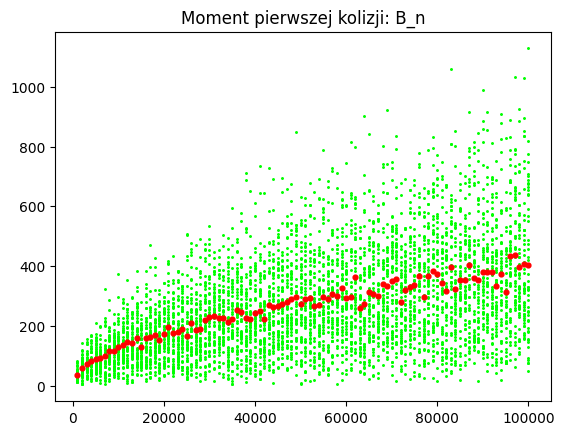

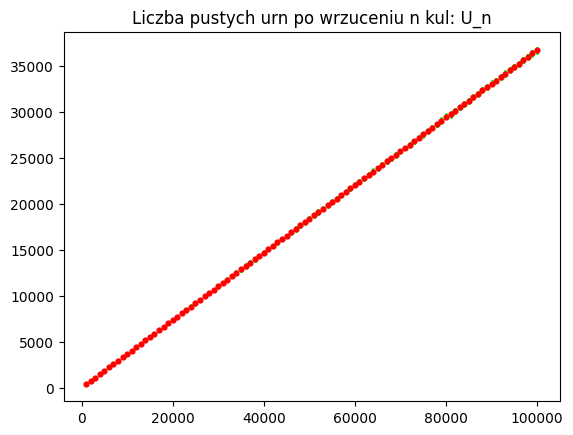

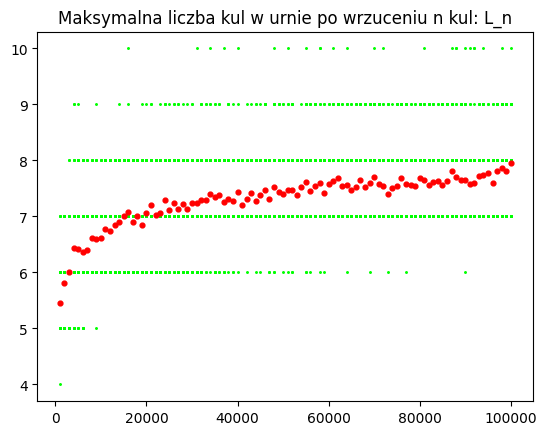

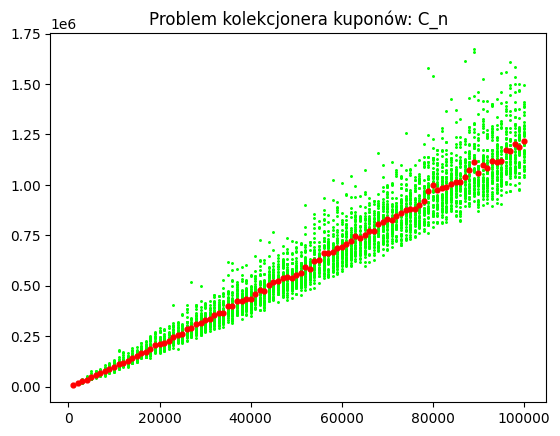

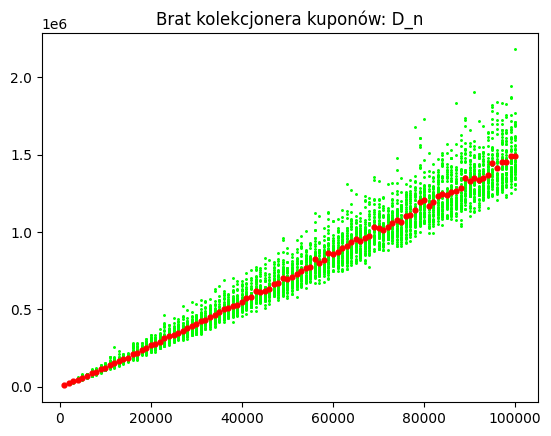

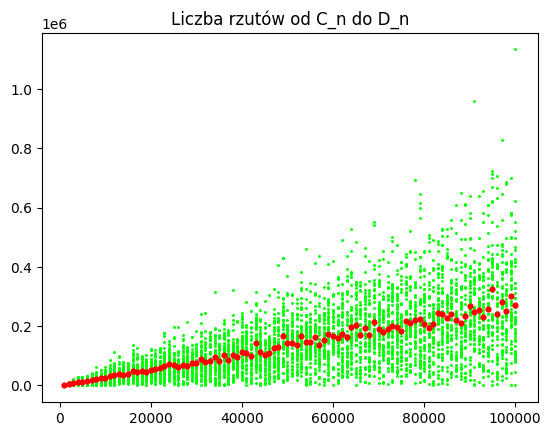

In [12]:
X = np.linspace(1000, 100000, 100) # single X axis
X_r = np.repeat(X, 50)
Y = np.empty((6, 5000), np.dtype("i4")) # [[all B_n results], ..., [all D_n - C_n results]]
Yavg = np.empty((6, 100), np.dtype("f8")) # [[avg B_n for each n], [avg U_n for each n], ..., [avg D_n - avg C_n for each n]]

# collect values from each thread

for i in range(10):
    
    results = open("results{i}.txt".format(i=1000 + 10000*i), "r")
    
    for j in range(10):
        
        full_result = np.empty((6, 50), np.dtype("i4"))
        
        begin_index = 500 * i + 50 * j
        
        # collect results for all 50 trials
        
        for k in range(50):
            
            # read results from a single trial
            
            single_result = [int(i) for i in results.readline().rstrip("\n").split(" ")]
            
            # transpose and store the trial result in the full results matrix
            
            for l in range(6):
                Y[l][begin_index + k] = single_result[l]
        
        # calculate avg of all 50 trials 
        
        for l in range(6):
            Yavg[l][10*i + j] = np.sum(Y[l][begin_index : begin_index+50]) / 50

    results.close()
    
result_titles = ["Moment pierwszej kolizji: B_n", "Liczba pustych urn po wrzuceniu n kul: U_n",
                 "Maksymalna liczba kul w urnie po wrzuceniu n kul: L_n", "Problem kolekcjonera kuponów: C_n",
                 "Brat kolekcjonera kuponów: D_n", "Liczba rzutów od C_n do D_n"]

ax_xtitles = ["n" for i in range(6)]
ax_ytitles = ["liczba kul", "liczba pustych urn", "maksymalna liczba kul",
              "minimalna liczba rzutów", "minimalna liczba rzutów", "liczba rzutów"]
    
for k in range(6):
    plt.scatter(X_r, Y[k], 5, c='lime', marker='.')
    plt.scatter(X, Yavg[k], 12, c='r', marker='o')
    plt.title(result_titles[k])
    #ax = plt.axes()
    #ax.set_xlabel(ax_xtitles[k])
    #ax.set_ylabel(ax_ytitles[k])
    plt.show()

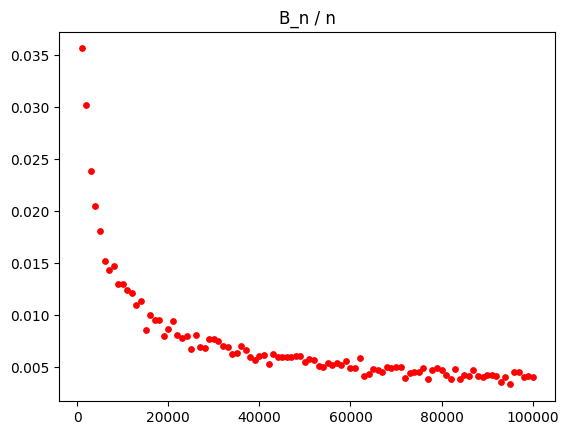

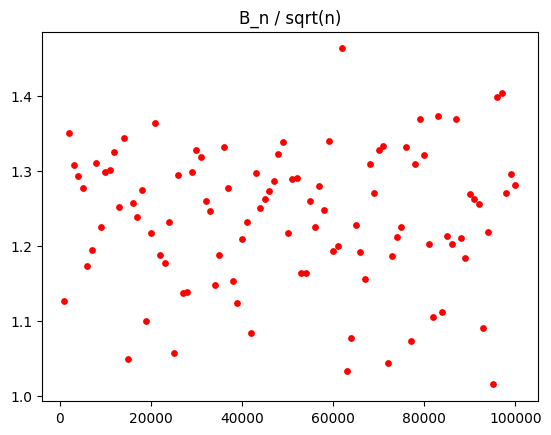

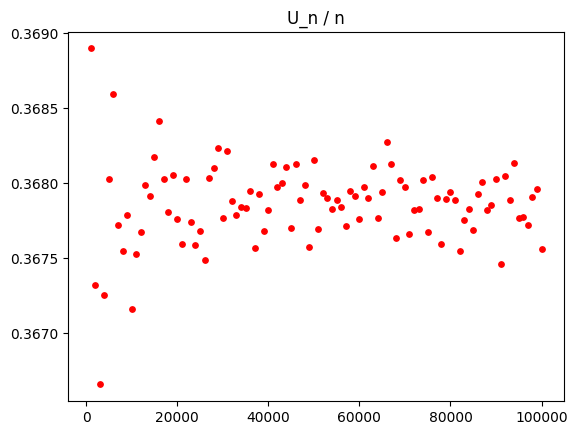

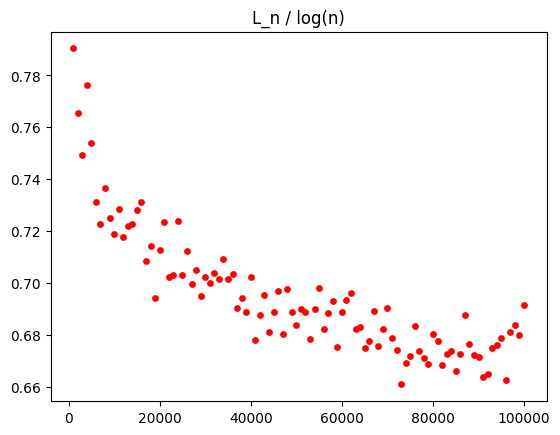

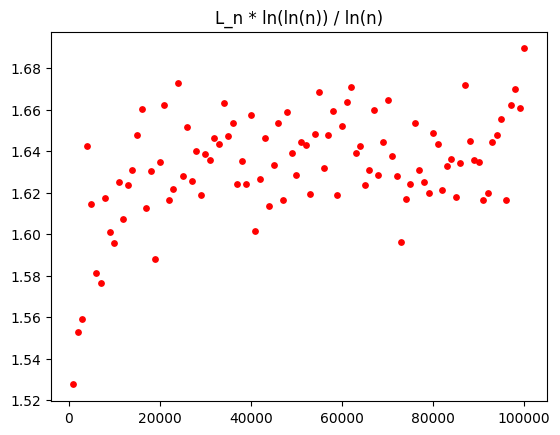

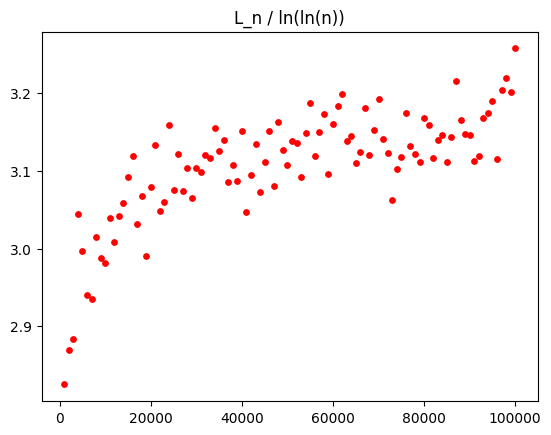

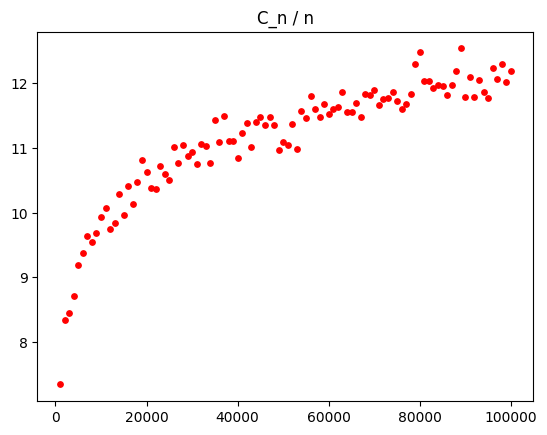

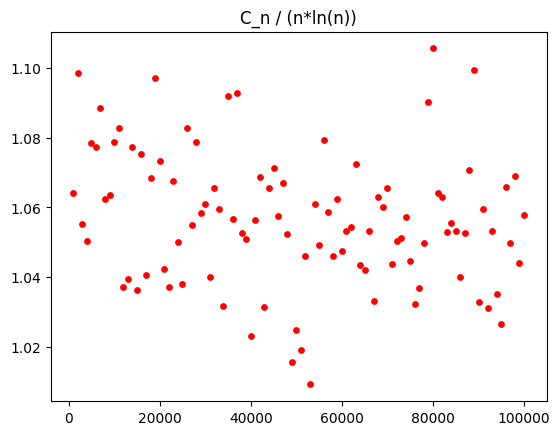

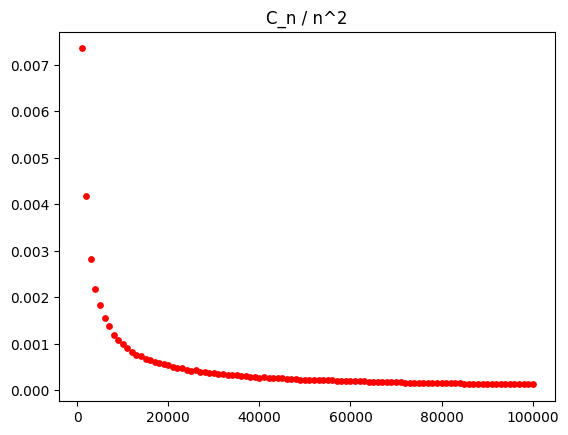

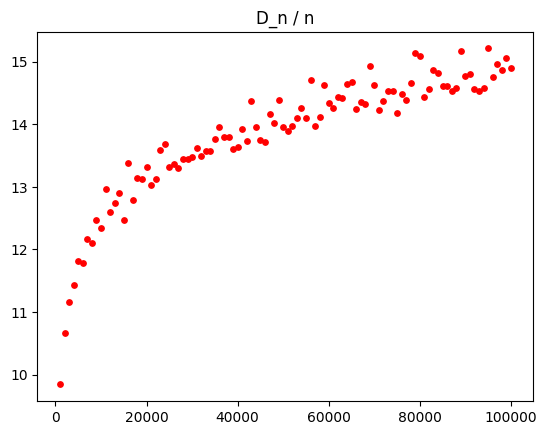

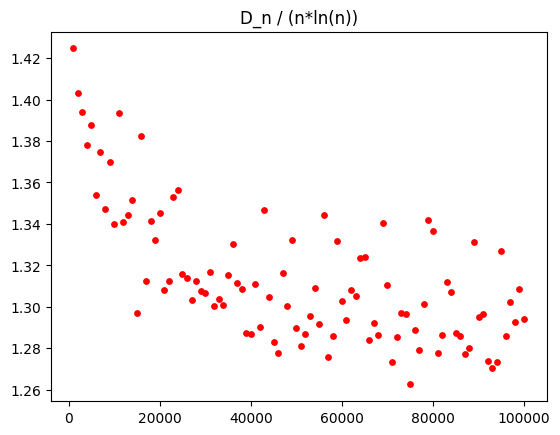

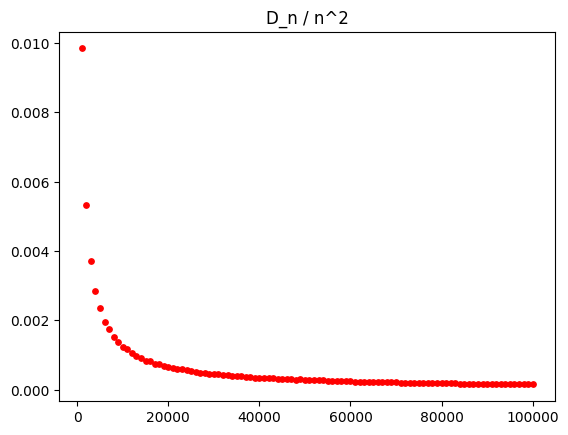

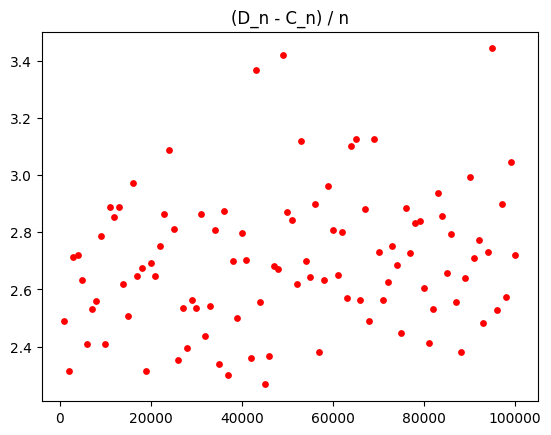

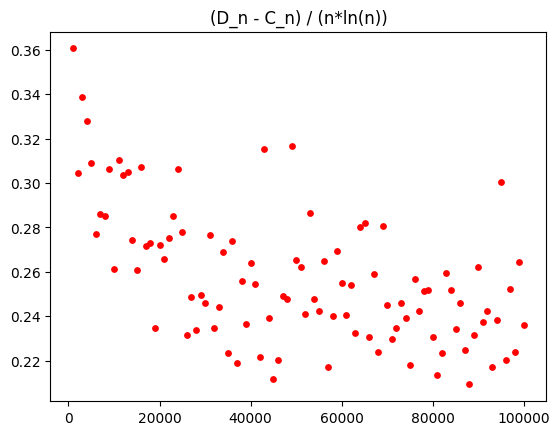

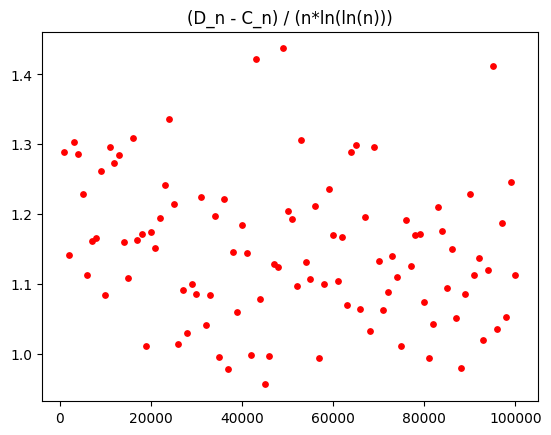

In [13]:
f_list = [Yavg[0] / X, Yavg[0] / np.sqrt(X),
          Yavg[1] / X,
          Yavg[2] / np.log(X), Yavg[2] * np.log(np.log(X)) / np.log(X), Yavg[2] / np.log(np.log(X)),
          Yavg[3] / X, Yavg[3] / X / np.log(X), Yavg[3] / X / X,
          Yavg[4] / X, Yavg[4] / X / np.log(X), Yavg[4] / X / X,
          Yavg[5] / X, Yavg[5] / X / np.log(X), Yavg[5] / X / np.log(np.log(X))]

f_titles = ["B_n / n", "B_n / sqrt(n)",
          "U_n / n",
          "L_n / log(n)", "L_n * ln(ln(n)) / ln(n)", "L_n / ln(ln(n))",
          "C_n / n", "C_n / (n*ln(n))", "C_n / n^2",
          "D_n / n", "D_n / (n*ln(n))", "D_n / n^2",
          "(D_n - C_n) / n", "(D_n - C_n) / (n*ln(n))", "(D_n - C_n) / (n*ln(ln(n)))"]

for Y_f, f_title in zip(f_list, f_titles):
    plt.scatter(X, Y_f, 15, c='r')
    plt.title(f_title)
    plt.show()